# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [82]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [83]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [84]:
# Read your api key environment variable
# YOUR CODE HERE!
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()
api_key = os.getenv("news_api")

In [85]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [86]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_headlines = newsapi.get_everything(
    q="bitcoin", 
    language="en",
    page_size=100
)
btc_headlines["articles"][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Timothy B. Lee, Ars Technica',
 'title': 'An Engineer Gets 9 Years for Stealing $10M From Microsoft',
 'description': 'The defendant tried—and failed—to use bitcoin to cover his tracks.',
 'url': 'https://www.wired.com/story/an-engineer-gets-9-years-for-stealing-dollar10m-from-microsoft/',
 'urlToImage': 'https://media.wired.com/photos/5fac6afb446b4639b3d5b8d8/191:100/w_1280,c_limit/Security-Microsoft-1229426260.jpg',
 'publishedAt': '2020-11-12T14:00:00Z',
 'content': "A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars]"}

In [87]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_headlines = newsapi.get_everything(
    q="ethereum", 
    language="en",
    page_size=100
)
eth_headlines["articles"][0]

{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Karissa Bell',
 'title': 'PayPal now lets all US users buy, sell and hold cryptocurrency',
 'description': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only available to a small subset of PayPal account holders. That’s…',
 'url': 'https://www.engadget.com/paypal-opens-cryptocurrency-all-us-accounts-210541778.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-11%2F4e1af080-2528-11eb-bbdf-193e571d142a&client=amp-blogside-v2&signature=22ad23dde6ee3e667a8067a4c39e1962659cec92',
 'publishedAt': '2020-11-12T21:05:41Z',
 'content': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptoc

In [88]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["compound", "positive", "negative", "neutral", "text"]
btc_df = btc_df[cols]

btc_df.head()

,compound,positive,negative,neutral,text
0,-0.6705,0.064,0.199,0.737,A former Microsoft software engineer from Ukra...
1,0.6369,0.162,0.000,0.838,Visa has partnered with cryptocurrency startup...
2,0.2144,0.053,0.000,0.947,PayPal is bringing its newly-announced support...
3,0.2023,0.050,0.000,0.950,"In November 2017, after an absolutely massive,..."
4,0.0000,0.000,0.000,1.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."


In [89]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["compound", "positive", "negative", "neutral", "text"]
eth_df = eth_df[cols]

eth_df.head()

,compound,positive,negative,neutral,text
0,0.2144,0.053,0.0,0.947,PayPal is bringing its newly-announced support...
1,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...
3,0.4215,0.088,0.0,0.912,LONDON (Reuters) - Digital currencies Ethereum...
4,0.1779,0.052,0.0,0.948,NEW YORK (Reuters) - Institutional investors p...


In [90]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,positive,negative,neutral
count,98.000000,98.000000,98.000000,98.000000
mean,0.151223,0.056990,0.020847,0.922173
std,0.338619,0.065976,0.053264,0.083086
min,-0.946800,0.000000,0.000000,0.637000
25%,0.000000,0.000000,0.000000,0.858000
50%,0.000000,0.050000,0.000000,0.948000
75%,0.416600,0.120000,0.000000,1.000000
max,0.877900,0.318000,0.363000,1.000000


In [91]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,positive,negative,neutral
count,97.000000,97.000000,97.000000,97.000000
mean,0.237426,0.078505,0.020165,0.901340
std,0.359391,0.079579,0.043562,0.089348
min,-0.670500,0.000000,0.000000,0.653000
25%,0.000000,0.000000,0.000000,0.847000
50%,0.226300,0.074000,0.000000,0.912000
75%,0.510600,0.132000,0.000000,1.000000
max,0.883400,0.347000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [92]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

lemmatizer = WordNetLemmatizer()

In [105]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!


In [106]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words
    sw = set(stopwords.words('english'))
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    # Remove the punctuation
    re_clean = regex.sub('', text)
    # Remove the stop words
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [107]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!

btc_df["tokens"] = btc_df["text"].apply(tokenizer)
btc_df.head()

,compound,positive,negative,neutral,text,tokens
0,-0.6705,0.064,0.199,0.737,A former Microsoft software engineer from Ukra...,"[former, microsoft, software, engineer, ukrain..."
1,0.6369,0.162,0.000,0.838,Visa has partnered with cryptocurrency startup...,"[visahas, partnered, cryptocurrency, startup, ..."
2,0.2144,0.053,0.000,0.947,PayPal is bringing its newly-announced support...,"[paypal, bringing, newlyannounced, support, cr..."
3,0.2023,0.050,0.000,0.950,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, twomonth, rall..."
4,0.0000,0.000,0.000,1.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[unlike, conventional, cryptocurrencies, centr..."


In [108]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
eth_df["tokens"] = eth_df["text"].apply(tokenizer)
eth_df.head()

,compound,positive,negative,neutral,text,tokens
0,0.2144,0.053,0.0,0.947,PayPal is bringing its newly-announced support...,"[paypal, bringing, newlyannounced, support, cr..."
1,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
2,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
3,0.4215,0.088,0.0,0.912,LONDON (Reuters) - Digital currencies Ethereum...,"[london, reuters, digital, currency, ethereum,..."
4,0.1779,0.052,0.0,0.948,NEW YORK (Reuters) - Institutional investors p...,"[new, york, reuters, institutional, investor, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [109]:
from collections import Counter
from nltk import ngrams

In [110]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
N = 2
btc_ngrams = ngrams(tokenizer(btc_df["text"].str.cat()), N)
Counter(btc_ngrams).most_common(10)

[(('virtual', 'currency'), 31),
 (('reuters', 'bitcoin'), 26),
 (('currency', 'bitcoin'), 23),
 (('illustration', 'taken'), 23),
 (('charsby', 'reuters'), 20),
 (('bitcoin', 'seen'), 19),
 (('reuters', 'stafffile'), 13),
 (('stafffile', 'photo'), 13),
 (('representation', 'virtual'), 13),
 (('taken', 'november'), 12)]

In [111]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
N = 2 
eth_ngrams = ngrams(tokenizer(eth_df["text"].str.cat()), N)
Counter(eth_ngrams).most_common(10)

[(('virtual', 'currency'), 10),
 (('york', 'reuters'), 7),
 (('currency', 'bitcoin'), 7),
 (('illustration', 'taken'), 7),
 (('reuters', 'bitcoin'), 7),
 (('photo', 'representation'), 6),
 (('charsby', 'reuters'), 6),
 (('bitcoin', 'seen'), 6),
 (('ethereum', 'blockchain'), 6),
 (('seen', 'illustration'), 5)]

In [112]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [113]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
btc_counts = tokenizer(btc_df["text"].str.cat())
token_count(btc_counts)

[('bitcoin', 82),
 ('reuters', 69),
 ('currency', 39),
 ('virtual', 33),
 ('photo', 31),
 ('taken', 31),
 ('illustration', 27),
 ('reutersdado', 27),
 ('seen', 26),
 ('charsby', 25)]

In [114]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
eth_counts = tokenizer(eth_df["text"].str.cat())
token_count(eth_counts)

[('ethereum', 45),
 ('bitcoin', 33),
 ('ha', 24),
 ('reuters', 21),
 ('cryptocurrency', 17),
 ('blockchain', 16),
 ('currency', 13),
 ('asset', 13),
 ('price', 13),
 ('week', 12)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [115]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

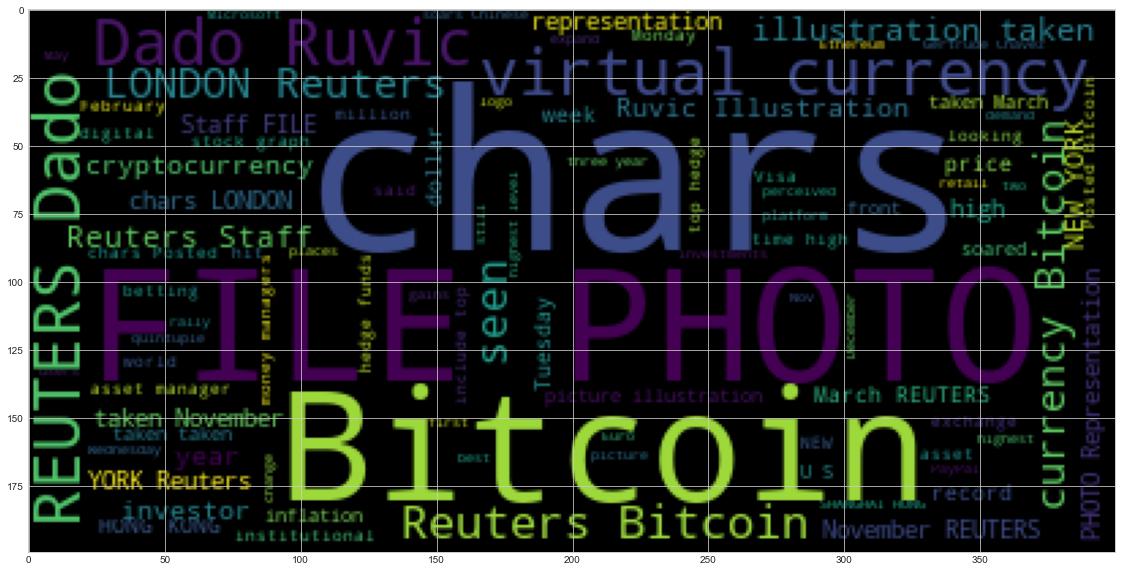

In [116]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
btc_wc = WordCloud().generate(btc_df["text"].str.cat())
plt.imshow(btc_wc)

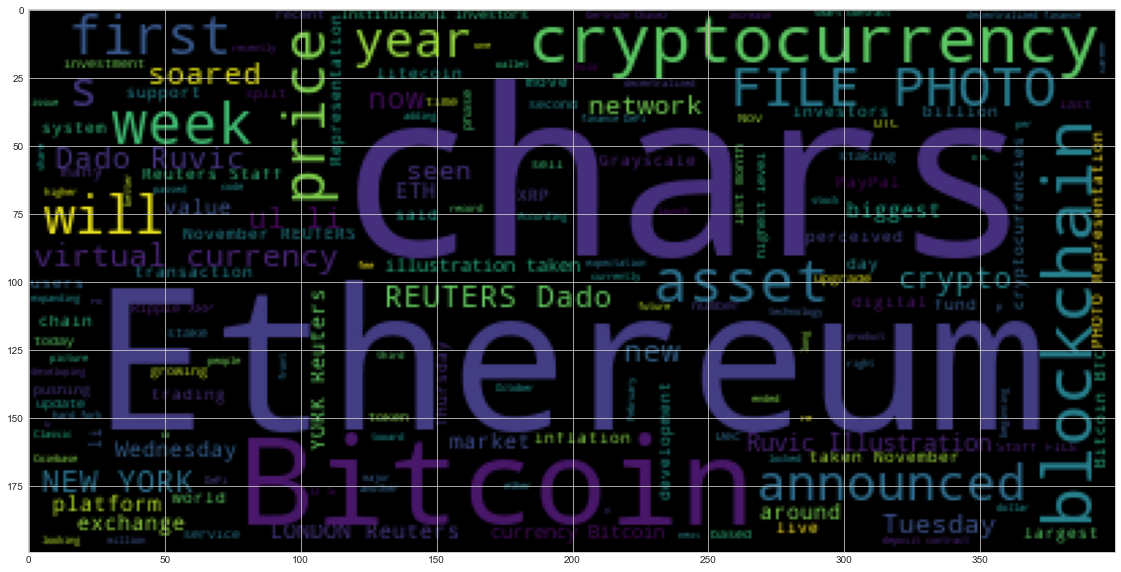

In [117]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_wc = WordCloud().generate(eth_df["text"].str.cat())
plt.imshow(eth_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [118]:
import spacy
from spacy import displacy

In [119]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm


In [120]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [121]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
btc_ner = btc_df["text"].str.cat()
btc_ner

hing the crypto markets over the past few weeks youll have noticed something special: bitcoin, everyones favorite decentralized digital currency based on hype, lies, and general mal… [+2490 chars]Six years after the launch of the Mexico-based crypotcurrency exchange and financial services platform Bitso the company revealed it has closed on $62 million in financing to capitalize on the crypto… [+4328 chars]Decentralized exchange protocols that allow crypto traders and investors to trade across different blockhains have been in development for a while. A significant new development now comes with the la… [+3079 chars]4. U.S. markets ended November with large gains. \r\nEven with a small decline today, the S&amp;P 500 jumped by 10.8 percent in November, its best monthly showing since April and the fourth-best month … [+535 chars]Maisie Williams also known as Arya Stark, daughter of Lady Catelyn and Lord Eddard, acolyte of the Faceless Men, you know the one is considering buying some bitc

In [122]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_npl = nlp(btc_ner)

# Add a title to the document
# YOUR CODE HERE!
btc_npl.user_data["title"] = "Bitcoin NER"

In [123]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_npl, style='ent')

In [124]:
# List all Entities
# YOUR CODE HERE!
for ent in eth_npl.ents:
    print(ent.text, ent.label_)

PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
XRP ORG
Monday DATE
YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
chars]The New York Times ORG
Coinbase ORG
early February this year DATE
last month DATE
October DATE
$24 million MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
U.S. GPE
May 26, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
LONDON GPE
Reuters ORG
Bitcoin GPE
Hedera ORG
Syrians NORP
Hala Systems ORG
Paypal PERSON

---

## Ethereum NER

In [125]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
eth_ner = eth_df["text"].str.cat()
eth_ner

y funds and products for the week ended Dec. 7, the second highest on record, pushing the sectors assets under manag… [+1888 chars]NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the second highest on record, pushing the sectors assets under manag… [+1888 chars]PayPal has launched the Generosity Network, a platform that allows users to create customized, personal fundraising campaigns. Yes, just like you can on GoFundMe.\xa0\r\nYou can raise a maximum of $20,000… [+1601 chars]By Reuters Staff\r\nFILE PHOTO: A representation of virtual currency Bitcoin is seen in front of a stock graph in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration/File photo\r\n… [+336 chars]By Reuters Staff\r\nFILE PHOTO: A representation of virtual currency Bitcoin is seen in front of a stock graph in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration/File photo\r\n… [+336 chars]Th

In [126]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_npl = nlp(eth_ner)

# Add a title to the document
# YOUR CODE HERE!
eth_npl.user_data["title"] = "Ethereum NER"

In [127]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_npl, style='ent')

In [128]:
# List all Entities
# YOUR CODE HERE!
for ent in eth_npl.ents:
    print(ent.text, ent.label_)

PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
XRP ORG
Monday DATE
YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
chars]The New York Times ORG
Coinbase ORG
early February this year DATE
last month DATE
October DATE
$24 million MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
U.S. GPE
May 26, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
LONDON GPE
Reuters ORG
Bitcoin GPE
Hedera ORG
Syrians NORP
Hala Systems ORG
Paypal PERSON